In [1]:
import pandas as pd

import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
42730,42730,5qRojknZn6ap1xVqOTBaEK,Disfear,Everyday Slaughter,A Race For Power,13,134973,False,0.267,0.988,...,-6.581,1,0.1070,0.000002,0.906000,0.0328,0.1460,134.718,4,grindcore
4960,4960,3SneyeUpTaZfmdT2LeEAhk,Project AER;v i v,How Are You? I'm Okay,Safe Space,11,173499,False,0.727,0.210,...,-16.490,1,0.0448,0.888000,0.844000,0.1100,0.0403,124.068,4,ambient
6714,6714,4OufvzIUm5RUveuvVVytNn,Wormwood,Arkivet,My Northern Heart,17,385714,False,0.308,0.901,...,-5.850,0,0.0607,0.000334,0.000059,0.0842,0.1310,196.059,4,black-metal


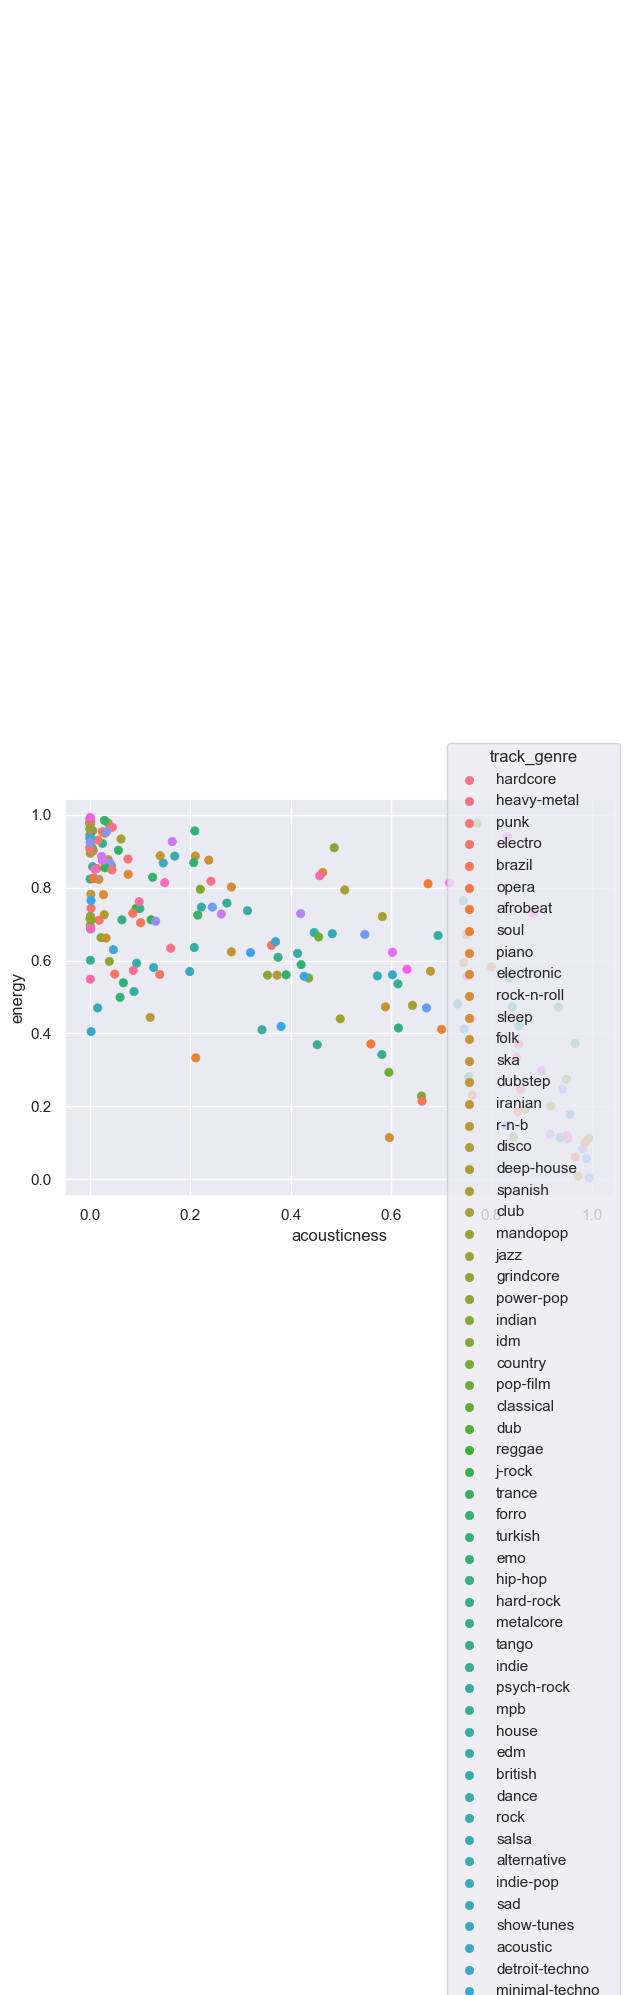

In [97]:

# Scatterplot mit Seaborn Objects erstellen
so.Plot(dataFrm.sample(200), x="acousticness", y="energy",color="track_genre").add(so.Dot()).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()


# Zeigt das die songs mit den meisten Energy auch am warscheinlichsten keine Austischen Teile dabei

<Axes: >

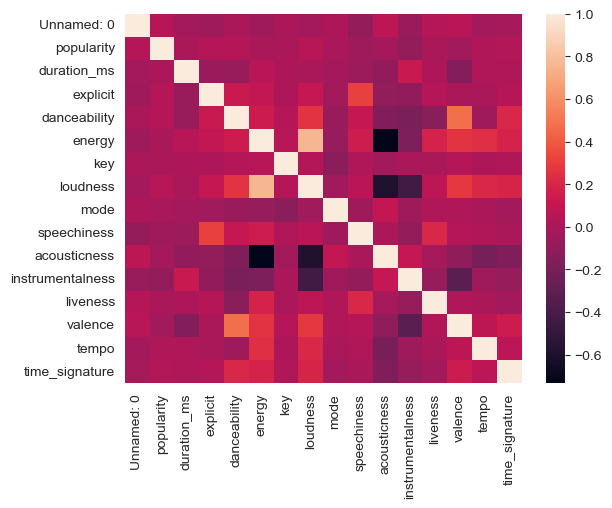

In [67]:
sns.heatmap(dataFrm.corr(numeric_only=True))
